In [6]:
# Cell 1: Set up code imports
import sys
sys.path.append('../')  # so you can import local modules

from modules.encoders import DNAEncoder
from modules.compressors import HuffmanCompressor
from modules.error_correction import HammingECC
from modules.error_models import SubstitutionErrorModel
from storage.database import SimpleDatabase
import matplotlib.pyplot as plt


In [7]:
# Cell 2: Run pipeline on sample data
text = "Jupyter DNA Storage Demo!"

compressor = HuffmanCompressor()
encoder = DNAEncoder()
ecc = HammingECC()
error_model = SubstitutionErrorModel(error_rate=0.1)

codes, compressed = compressor.compress(text)
dna_seq = encoder.encode(compressed)
ecc_bits = ecc.encode(compressed)
corrupted_dna = error_model.introduce_errors(dna_seq)
recovered, errors_corrected = ecc.decode(ecc_bits)
decompressed = compressor.decompress(codes, recovered)

print(f"Original: {text}")
print(f"Compressed bits: {compressed}")
print(f"DNA sequence: {dna_seq}")
print(f"Corrupted DNA: {corrupted_dna}")
print(f"Errors corrected: {errors_corrected}")
print(f"Decompressed: {decompressed}")


Original: Jupyter DNA Storage Demo!
Compressed bits: 1100111010110000000111101001111000011011110110100000111111110011110101101000101000010100110111011011
DNA sequence: ATACATACATAAATAAATACATACATACATAAATACATAAATACATACATAAATAAATAAATAAATAAATAAATAAATACATACATACATACATAAATACATAAATAAATACATACATACATACATAAATAAATAAATAAATACATACATAAATACATACATACATACATAAATACATACATAAATACATAAATAAATAAATAAATAAATACATACATACATACATACATACATACATACATAAATAAATACATACATACATACATAAATACATAAATACATACATAAATACATAAATAAATAAATACATAAATACATAAATAAATAAATAAATACATAAATACATAAATAAATACATACATAAATACATACATACATAAATACATACATAAATACATAC
Corrupted DNA: ATACATACAGAAATAAATACATACATACATAAATACACGAAAACATACAAAAATAAATAAATATATAAATAGATCTCTACATACATACATACATAGAGAGTTACATAAATACATAAATACCTTCATAAATACATAAATAAACACAGACATAGATACATCCATACATACATAAATACAGACGAAAATACATAAATAAAAAAATAAATAAATACATCCATACATACCAACAGACCTACACTCATAAGTAAATATTTACATACATTCATAAATACATAAATACATACATTAATACATAAATTAATAAATAAATAAAGACATAAATAAATAAATATATACATAAATACAAGTATAACTATATACATAAATACTTACATACATAAATACATACATAATTACGTAC
Errors correcte

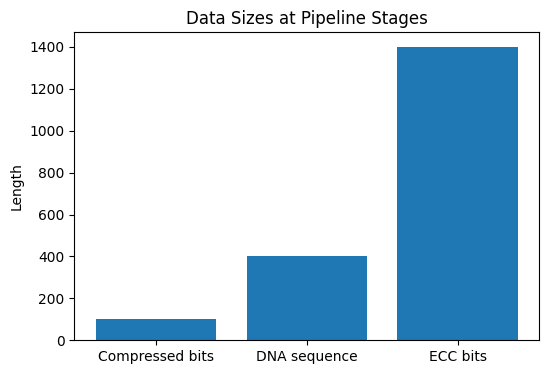

In [8]:
# Cell 3: Plot compression and DNA lengths
labels = ['Compressed bits', 'DNA sequence', 'ECC bits']
sizes = [len(compressed), len(dna_seq), len(ecc_bits)]

plt.figure(figsize=(6,4))
plt.bar(labels, sizes)
plt.ylabel("Length")
plt.title("Data Sizes at Pipeline Stages")
plt.show()


In [9]:
# Cell 4: Store/retrieve results with the database module
db = SimpleDatabase('notebook_db.json')
db.store('sample_dna', dna_seq)
db.store('sample_result', decompressed)
print("Database keys:", db.list_keys())
print("Retrieved DNA:", db.retrieve('sample_dna'))


Database keys: ['sample_dna', 'sample_result']
Retrieved DNA: ATACATACATAAATAAATACATACATACATAAATACATAAATACATACATAAATAAATAAATAAATAAATAAATAAATACATACATACATACATAAATACATAAATAAATACATACATACATACATAAATAAATAAATAAATACATACATAAATACATACATACATACATAAATACATACATAAATACATAAATAAATAAATAAATAAATACATACATACATACATACATACATACATACATAAATAAATACATACATACATACATAAATACATAAATACATACATAAATACATAAATAAATAAATACATAAATACATAAATAAATAAATAAATACATAAATACATAAATAAATACATACATAAATACATACATACATAAATACATACATAAATACATAC
